
## EXAMPLE OF DATA PRE-PROCESSING
The Diabetes Dataset involves predicting the onset of diabetes within 5 years

In [1]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
# transform the dataset into a Pandas DataFrame to make it easier to display
# it is not necessary to understand what is done here
dataset = pd.DataFrame(data= np.column_stack([iris['data'], iris['target']]),
                     columns= iris['feature_names'] + ['target'])

We can observe that the dataset has 5 feature, one of them, the "target" being the label, that categorise the data.

The 4 feature are all numerical and continuous.

In [3]:
# Head visualise the five first rows of your dataset
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


We know what kind of value are stored in our daatset, with what kind of features, but we don't know what it looks like. This is where visualisation tools help us.

[]

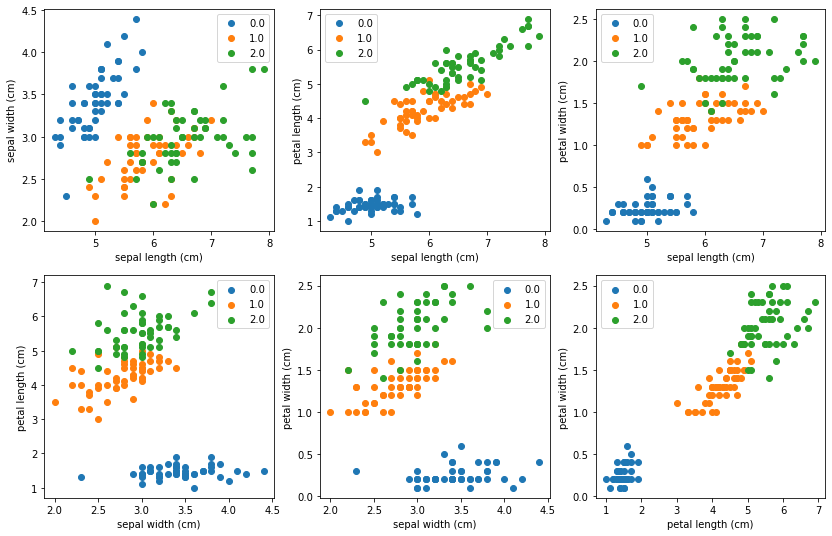

In [4]:
fig, axs = plt.subplots(2,3, figsize=(14,9))
color = ['tab:blue', 'tab:orange', 'tab:green']
for i in np.unique(dataset['target']):
    idx = dataset['target'] == i
    axs[0][0].scatter(dataset['sepal length (cm)'][idx], dataset['sepal width (cm)'][idx], c=color[int(i)], label=i)
    axs[0][1].scatter(dataset['sepal length (cm)'][idx], dataset['petal length (cm)'][idx], c=color[int(i)], label=i)
    axs[0][2].scatter(dataset['sepal length (cm)'][idx], dataset['petal width (cm)'][idx], c=color[int(i)], label=i)
    axs[1][0].scatter(dataset['sepal width (cm)'][idx], dataset['petal length (cm)'][idx], c=color[int(i)], label=i)
    axs[1][1].scatter(dataset['sepal width (cm)'][idx], dataset['petal width (cm)'][idx], c=color[int(i)], label=i)
    axs[1][2].scatter(dataset['petal length (cm)'][idx], dataset['petal width (cm)'][idx], c=color[int(i)], label=i)
# label
for i in range(3):
    axs[0][i].set_xlabel('sepal length (cm)')
for i in range(2):
    axs[1][i].set_xlabel('sepal width (cm)')
axs[1][2].set_xlabel('petal length (cm)')
axs[0][0].set_ylabel('sepal width (cm)')
axs[0][1].set_ylabel('petal length (cm)')
axs[0][2].set_ylabel('petal width (cm)')
axs[1][0].set_ylabel('petal length (cm)')
axs[1][1].set_ylabel('petal width (cm)')
axs[1][2].set_ylabel('petal width (cm)')
for i in range(3):
    for j in range(2):
        axs[j][i].legend()
plt.plot()    

[]

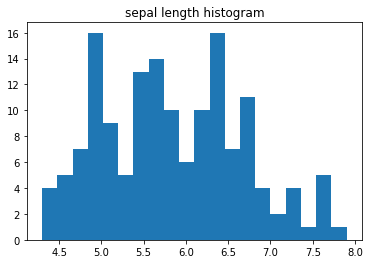

In [5]:
plt.hist(dataset['sepal length (cm)'], bins=20)
plt.title('sepal length histogram')
plt.plot()

In [6]:
'''
This line will allow us to load the dataset
The dataset should be in a CSV format
A CSV file is a delimited text file that uses a comma to separate values. 
Each line of the file is a data record.
''' 
# header: indicates if the dataset has an initial line with the name of each column
# 0 is the index of the first row
dataset = pd.read_csv('./dataset/titanic.csv', header=0)

This time we have more feature, and they are not all numerical nor continuous.
- Survived: Nominal
- Pclass: Nominal (or ordinal if you consider that the class can be ranked)
- Name: Nominal
- Sex: Nominal
- Age: Discrete
- Siblings/Spouses Aboard: Discrete
- Parents/Children Aboard: Discrete
- Fare: Continuous

In [7]:
# Head visualise the five first rows of your dataset
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [8]:
'''
First, we will try to 'visualise' the dataset
'''
# describe shows us a nice summary of descriptive statistics for each of the columns
print(dataset.describe())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

Note that columns are shown from zero to N-1
* Count: gives us the number of rows in the dataset
* Mean: mean of all the values in each column
* std: standard deviation
* min, max: minimum and maximum values
* 25%, 50%, and 75%: the 25th, 50th, and 75th percentiles, which is the same than quantile 1, quantile 2, and quantile 3

In [9]:
for i in dataset.columns:
    if i != 'Name':
        tmp = np.unique(dataset[i])
        if len(tmp) > 20:
            print(f'{i}: [{tmp[0]} -- {tmp[-1]}]')
        else:
            print(f'{i}: {tmp}')

Survived: [0 1]
Pclass: [1 2 3]
Sex: ['female' 'male']
Age: [0.42 -- 80.0]
Siblings/Spouses Aboard: [0 1 2 3 4 5 8]
Parents/Children Aboard: [0 1 2 3 4 5 6]
Fare: [0.0 -- 512.3292]


Again we want to get a visual understanding of our dataset. However the data is not anymore just some float value. We have a lot of nominal value for example. 

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

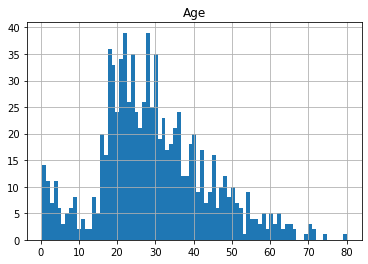

In [10]:
# we compute the range of age between the maximum and minimum value
age_range = int(dataset['Age'].max() - dataset['Age'].min())
dataset.hist(column='Age', bins=age_range)

[]

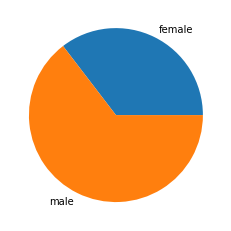

In [11]:
lb, x = np.unique(dataset['Sex'], return_counts=True)
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(x, labels=lb)
plt.plot()

<AxesSubplot:xlabel='Age', ylabel='Siblings/Spouses Aboard'>

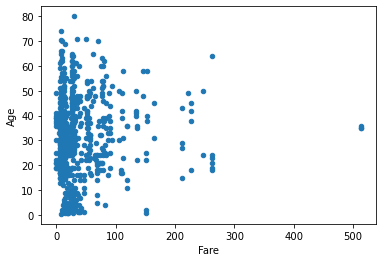

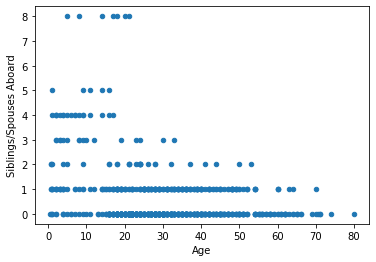

In [12]:
dataset.plot.scatter(x='Fare', y='Age')
dataset.plot.scatter(x='Age', y='Siblings/Spouses Aboard')

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

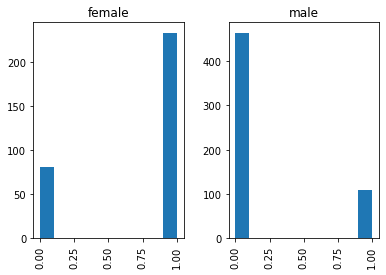

In [13]:
dataset.hist(column='Survived', by=dataset['Sex'])

[]

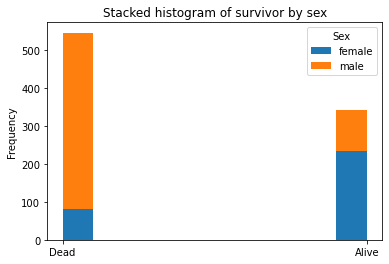

In [14]:
counts = dataset.pivot(columns='Sex').Survived
ax = plt.subplot(111)
ax.set_xticks([0,1])
ax.set_xticklabels(['Dead', 'Alive'])
counts.plot(kind='hist', stacked=True, title='Stacked histogram of survivor by sex', ax = ax)
plt.plot()

[]

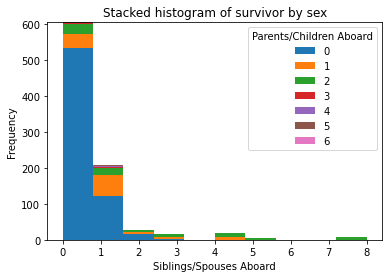

In [15]:
counts = dataset.pivot(columns='Parents/Children Aboard')['Siblings/Spouses Aboard']
ax = plt.subplot(111)
ax.set_xlabel('Siblings/Spouses Aboard')
counts.plot(kind='hist', stacked=True, title='Stacked histogram of survivor by sex', ax = ax)
plt.plot()

[]

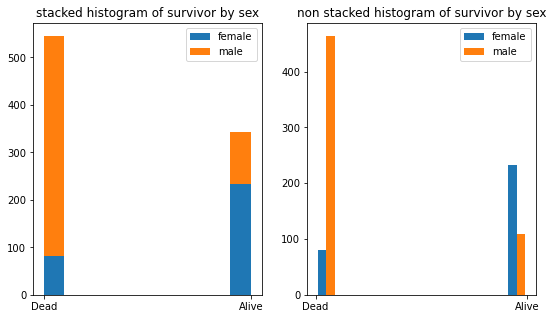

In [16]:
counts = dataset.groupby(['Sex'], as_index=False)
fig, axs = plt.subplots(1,2, figsize=(9,5))
axs[0].hist([i[1]['Survived'] for i in counts], stacked=True, label=[i[0] for i in counts])
axs[1].hist([i[1]['Survived'] for i in counts], stacked=False, label=[i[0] for i in counts])
# sugar style
axs[0].set_title('stacked histogram of survivor by sex')
axs[1].set_title('non stacked histogram of survivor by sex')
axs[0].legend()
axs[1].legend()
axs[0].set_xticks([0,1])
axs[0].set_xticklabels(['Dead', 'Alive'])
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(['Dead', 'Alive'])
plt.plot()

[]

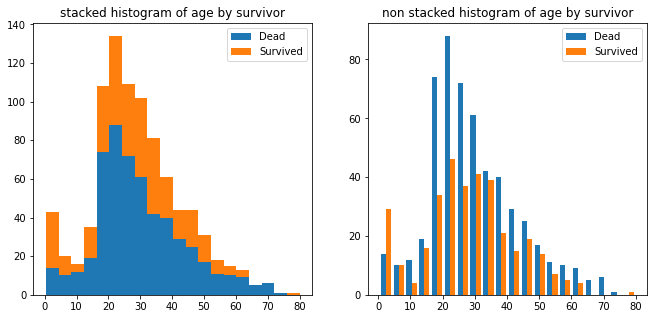

In [17]:
counts = dataset.groupby(['Survived'], as_index=False)
fig, axs = plt.subplots(1,2, figsize=(11,5))
axs[0].hist([i[1]['Age'] for i in counts], stacked=True, label=[['Dead', 'Survived'][i[0]] for i in counts], bins=20)
axs[1].hist([i[1]['Age'] for i in counts], stacked=False, label=[['Dead', 'Survived'][i[0]] for i in counts], bins=20)
# sugar style
axs[0].set_title('stacked histogram of age by survivor')
axs[1].set_title('non stacked histogram of age by survivor')
axs[0].legend()
axs[1].legend()
plt.plot()

Text(0.5, 0, 'Age')

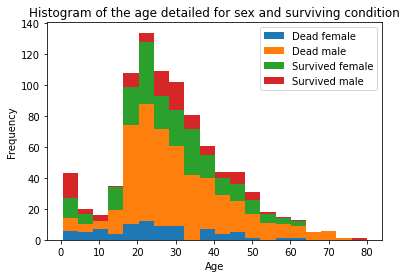

In [18]:
counts = dataset.groupby(['Survived', 'Sex'], as_index=False)
plt.hist([i[1]['Age'] for i in counts], stacked=True, label=[['Dead', 'Survived'][i[0][0]] + ' ' + i[0][1] for i in counts], bins=20)
plt.legend()
plt.title('Histogram of the age detailed for sex and surviving condition')
plt.ylabel('Frequency')
plt.xlabel('Age')

[]

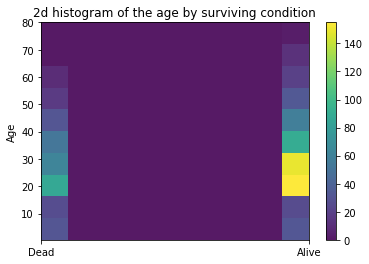

In [19]:
plt.hist2d(dataset['Sex']=='male', dataset['Age'], alpha=0.9)
plt.xticks([0,1], ['Dead', 'Alive'])
plt.ylabel('Age')
plt.colorbar()
plt.title('2d histogram of the age by surviving condition')
plt.plot()

[]

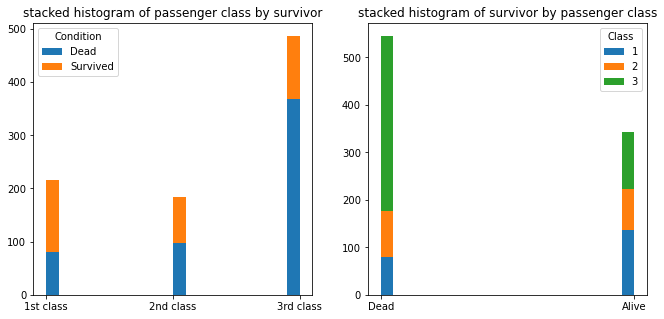

In [20]:
counts1 = dataset.groupby(['Survived'], as_index=False)
counts2 = dataset.groupby(['Pclass'], as_index=False)
fig, axs = plt.subplots(1,2, figsize=(11,5))
axs[0].hist([i[1]['Pclass'] for i in counts1], stacked=True, label=[['Dead', 'Survived'][i[0]] for i in counts1], bins=20)
axs[1].hist([i[1]['Survived'] for i in counts2], stacked=True, label=[i[0] for i in counts2], bins=20)
# sugar style
axs[0].set_title('stacked histogram of passenger class by survivor')
axs[1].set_title('stacked histogram of survivor by passenger class')
axs[0].legend(title='Condition')
axs[1].legend(title='Class')
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(['Dead', 'Alive'])
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(['1st class','2nd class','3rd class'])
plt.plot()

NEW DATA

In [21]:
'''
This line will allow us to load the dataset
The dataset should be in a CSV format
A CSV file is a delimited text file that uses a comma to separate values. 
Each line of the file is a data record.
''' 
# header: indicates if the dataset has an initial line with the name of each column
dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)

Attributes of the dataset: (all numeric-valued with no header)

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years) 
9. Class variable (0 or 1) where class value 1 is interpreted as "tested positive for diabetes"



In [22]:
# Head visualise the five first rows of your dataset
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
'''
First, we will try to 'visualise' the dataset
'''
# describe shows us a nice summary of descriptive statistics for each of the columns
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [24]:
'''
There are missing observations for some columns that are marked as a zero value.
Note that this does not include column 8, the class variable where zero indicates that the subject is not tested positive
Note that the minimum value in column 6 and 7 is different than zero, then there is no missing values in these columns
'''
# replace: allow us to replace a given value with another one
# In this case, we want to replace '0' values with 'nan'
# In Pandas missing data is represented by the None object and nan (not a number)
# Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. 
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

In [25]:
'''
We are going to count the number of NAN values in each column
'''
# isnull returns all the nan instances 
# sum sums all the previous nan occurrences
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


We can see here that the number of null instances varies significantly.
We are going to calculate the percentage of them to see the real inpact

The formula is:

$\Large\frac{NumberNullValues}{TotalNumberSamples}*100$

We need to calculate the total number of samples

In [26]:
# The index of the dataset give us the range of values
print(dataset.index)

RangeIndex(start=0, stop=768, step=1)


In [27]:
# The length of the index returns the total number of samples
print(len(dataset.index))

768


In [28]:
'''
Now we are going to calculate the percentage of values that are null for each column
The treatment of these null values may be different according to their quantity
'''
values = dataset.isnull().sum()/len(dataset.index)*100
print(values)


0     0.000000
1     0.651042
2     4.557292
3    29.557292
4    48.697917
5     1.432292
6     0.000000
7     0.000000
8     0.000000
dtype: float64


In [29]:
# We can also format the output to give us the %
# for that we need to iterate through the vector
for i in values:
    print(f'{i:.0f}%')

0%
1%
5%
30%
49%
1%
0%
0%
0%


### Remove rows with missing values
The simplest approach for dealing with missing values is to remove the entire sample that contain missing values.
Pandas provides the **dropna()** function that can be used to drop either columns or rows with missing data. 

In [30]:
# We can show the dimensions of the dataset before the removal with the function shape
print(dataset.shape)

(768, 9)


In [31]:
'''
We can use it to remove all rows with missing data, as follows:
'''
# inplace=False returns a copy of the object with the operation performed. inplace=True returns None
dataset.dropna(inplace=True)

In [32]:
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(392, 9)


We can see here that we get rid of the problem, but removing almost half of our dataset, worthy?

### Filled in missing values
There are many options we could consider when replacing a missing value, for example:
* A constant value that has meaning within the domain, such as 0, distinct from all other values. 
* A value from another randomly selected record. 
* A mean, median or mode value for the column. 
* A value estimated by another predictive model. 

Pandas provides the **fillna()** function for replacing missing values with a specific value.

In [33]:
'''
Again we load the dataset and mark missing values to have a fresh data
'''
# load again the dataset
dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

In [34]:
# count again the number of NaN values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [35]:
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)

In [36]:
# count again the number of NaN values in each column
print(dataset.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


### Normalisation of the data
We are going to use mix-max normalisation to scale the features of our dataset.
This method rescales the range of the data to [0,1]
The formula is the following:

$\Large x_n=\frac{x-min(x)}{max(x)-min(x)}$

In [37]:
# we use again describe to show the summary of descriptive statistics for each of the columns
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.435949   12.096346    8.790942   85.021108    6.875151   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      3.000000  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [38]:
# We see that we need to calculate the maximum and minimum values for each attibute
# This is done with functions min() and max()
column_max = dataset.max()
column_min = dataset.min()
print(column_max)
print(column_min)

0     17.00
1    199.00
2    122.00
3     99.00
4    846.00
5     67.10
6      2.42
7     81.00
8      1.00
dtype: float64
0     0.000
1    44.000
2    24.000
3     7.000
4    14.000
5    18.200
6     0.078
7    21.000
8     0.000
dtype: float64


In [39]:
# and now we calculate the formula
dataset_norm = (dataset - column_min) / (column_max - column_min)

In [40]:
# we use again describe to show the summary of descriptive statistics for each of the columns
print(dataset_norm.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.501205    0.493930    0.240798    0.170130    0.291564   
std      0.198210    0.196361    0.123432    0.095554    0.102189    0.140596   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.359677    0.408163    0.195652    0.129207    0.190184   
50%      0.176471    0.470968    0.491863    0.240798    0.170130    0.290389   
75%      0.352941    0.620968    0.571429    0.271739    0.170130    0.376278   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.168179    0.204015    0.348958  
std      0.141473    0.196004    0.476951  
min      0.000000    0.000000    0.000000  
25%      0.070773    0.050000    0.000000  
50%   